# **HOUSING RENT PRICE**

---



# CONTENTS

## **1. INTRODUCTION**
### 1.1 Description
### 1.2 Expected Outcomes

## **2. DATASET**
### 2.1 DATA COLLECTION THROUGH WEBSCRAPING
### 2.2 DATA SOURCE DETAILS
### 2.3 DATA DESCRIPTION

## **3. DATA UNDERSTANDING**
### 3.1 IMPORTING THE RELEVANT LIBRARIES
### 3.2 IMPORTING DATASET FROM DRIVE
### 3.3 MERGED DATA
### 3.4 DATA INFORMATION
### 3.5 READING COLUMNS IN THE DATASETS
### 3.6 DATASET SHAPE
### 3.7 DESCRIPTIVE ANALYSIS

## **4. DATA CLEANING**
### **PART A: MISSING VALUES(INTERPRETING NUMERICALLY)**
#### 4.1 CHECKING FOR MISSING VALUES
#### 4.2 CHECKING MISSING PERCENTAGE
### **PART B: VISUALIZING THE MISSING VALUES(INTERPRETING GRAPHICALLY)**
### **PART C: DEALING WITH MISSING VALUES**
#### 4.3 IDENTIFY FEATURE WITH MISSING VALUE
#### 4.4 DROP/DELETE MISSING VALUES
#### 4.5 REASON FOR MISSING 74% DESCRIPTION DATA
#### 4.6 IMPUTING NULL VARIABLE numBathrooms
#### 4.7 CONVERT DATATYPE AND MAKE NEW FEATURE
#### 4.8 CHECKING ANY OUTLIER
#### 4.9 Removing Outliers

## **5. DATA VISUALIZATION**
### 5.1 UNIVARIATE ANALYSIS
### 5.2 MULTIVARIATE ANALYSIS
### 5.3 BAR GRAPH
### 5.4 SCATTER PLOT
### 5.5 PIE CHART
### 5.6 GEOGRAPHICAL VARIABLES

## **6. FEATURE ENGINEERING**
### 6.1 TRANSFORMING DATA WITH TWO COLUMNS TO CREATE A FEATURE
### 6.2 FEATURE EXTRACT ON DESCRIPTION
### 6.3 NUMERICAL VARIABLE TRANSFORMATION
### 6.4 CATEGORICAL VARIABLE TRANSFORMATION
### 6.5 CREATE FINAL DATASET

## **7. MODEL BUILDING**
### 7.1 SPLIT OUR DATA
### 7.2 BUILT MODEL
### 7.3 CONCLUSION


# **1. INTRODUCTION**


**1.1 DESCRIPTION**


---


**The project consists of two main parts:**


*   **Exploratory Data Analysis (EDA):**

Analysis of trends in metropolitan cities.
Exploration of various factors that may influence rent prices, such as location, house size, number of bathrooms, etc.
Visualization of relationships between different variables and rent prices.

* **Modeling:**

Development of machine learning models to predict the rent price of houses.
Selection of appropriate features and preprocessing steps.
Evaluation of model performance using suitable metrics and techniques.



**1.2 Expected Outcomes**


---

* The project aims to create accurate predictive models for rental housing prices in major cities using Linear Regression and Random Forest algorithms. It uses extensive analysis to find patterns in rental prices, identify major demand, and measure model performance using evaluation metrics. The study's findings will help stakeholders understand housing market dynamics and make more informed choices about rental property investments and pricing strategies. Future aims include expanding the model's feature set, including new data sources, and responding to changing market conditions to increase prediction accuracy and relevance.



# **2. DATASET**

**2.1 DATA COLLECTION THROUGH WEBSCRAPING**


---



 * Using web scraping we have gathered metropolitan city data for Mumbai, Pune, Delhi, Ahmedabad, Surat, Chennai, Kolkata, Bangalore, and Hyderabad.

In [95]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import math

In [96]:
# Function to extract text from elements or return nan if element is not found

def extract_or_nan(element):
    return getattr(element, 'text', math.nan)

def get_or_nan(element):
    return element if hasattr(element, '__class__') else math.nan

In [97]:
def scrape_listing(url):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        data = {}

        # Extract data with NaN handling
        data['house_type'] = extract_or_nan(soup.find('span', class_='type'))
        data['house_size'] = extract_or_nan(soup.find('span', class_='size'))
        data['location'] = extract_or_nan(soup.find('span', class_='ib loc-name'))
        data['city'] = extract_or_nan(soup.find('span', class_='ib city-name'))
        data['latitude'] = get_or_nan(soup.find('meta', itemprop='latitude').get('content'))
        data['longitude'] = get_or_nan(soup.find('meta', itemprop='longitude').get('content'))
        data['price'] = get_or_nan(soup.find('meta', itemprop='price').get('content'))
        data['currency'] = get_or_nan(soup.find('meta', itemprop='priceCurrency').get('content'))
        data['numBathrooms'] = extract_or_nan(soup.find('td', id="Bathrooms"))
        data['verificationDate'] = extract_or_nan(soup.find('div', class_="verification-date"))
        data['description'] = extract_or_nan(soup.find('div', class_='clearfix hidden'))
        data['SecurityDeposit'] = extract_or_nan(soup.find('td', id="Security Deposit"))
        data['Status'] = extract_or_nan(soup.find('td', id="Status"))

        return data
    else:
        return None

In [98]:
# For demonstration purposes, we have set a data limit of just 2. Therefore, the code will run faster.

def scrape_city_data(city, limit=2):
    url = f"https://www.makaan.com/{city}-residential-property/rent-property-in-{city}-city"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        all_data = []

        while True:
            listings = soup.find_all("div", class_="cardLayout clearfix")

            for listing in listings:
                new_url = listing.find('meta', itemprop='url').get('content')
                listing_data = scrape_listing(new_url)
                if listing_data:
                    all_data.append(listing_data)
                    if len(all_data) == limit:
                        break

            next_page_components = soup.find(attrs={"aria-label": "nextPage"})
            if not next_page_components or len(all_data) == limit:
                break

            url = next_page_components.get('href')
            response = requests.get(url)
            if response.status_code == 200:
                soup = BeautifulSoup(response.content, 'html.parser')
            else:
                break

        df = pd.DataFrame(all_data)
        df.to_csv(f'Indian_housing_{city}_data.csv', index=False)
        print(f'{city}\'s data was scraped successfully')
    else:
        print(f'Failed to scrape {city}')

In [99]:
# Uncomment this code for Run WebScarping
# Metropolitan Cities of India

# cities = ['Mumbai','Pune','Delhi','Ahmedabad','Surat','Chennai','Kolkata','Bangalore','Hyderabad']


# for city in cities:
#     scrape_city_data(city)

**2.2 DATA SOURCE DETAILS**


---



* **Type** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;:-&nbsp;&nbsp;CSV formate
* **Source of Website**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;:-&nbsp;&nbsp; https://www.makaan.com/
* **Accessing Data of web scraping Data**&nbsp;&nbsp;&nbsp; :-&nbsp;&nbsp; https://drive.google.com/drive/folders/1I4CpQp477krguDjalKKlVLiqKR0hMpfE?usp=sharing
* **Method**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;:-&nbsp;&nbsp; web scraping

**2.3 DATA DESCRIPTION**


---





The data for this project was obtained through web scraping of real estate listings in major Indian metropolitan cities, including Ahmedabad, Bangalore, Chennai, Delhi, Hyderabad, Kolkata, Mumbai, Pune, and Surat. Each city's real estate website was scraped to collect information about rental properties, such as house type, size, location, price, number of bathrooms, and additional descriptive attributes.

* **Individual Datasets:**

After scraping, the collected data was organized into nine separate datasets, each corresponding to one of the aforementioned cities. These datasets, named df_ah, df_ba, df_ch, df_de, df_hy, df_ko, df_mu, df_pu, and df_su, contain information about rental properties specific to each city.

* **Merged DataFrame:**

To facilitate analysis and modeling, the individual datasets were merged into a single DataFrame. This merged DataFrame combines the rental property listings from all nine cities, allowing for comprehensive exploration of trends and patterns across different metropolitan areas.





-> The dataset contains a total of 15,306 records. Data type of variables :
```markdown
- `house_type`:  non-null objects
- `house_size`:  non-null objects
- `location`:  non-null objects
- `city`:  non-null objects
- `latitude`:  non-null float64
- `longitude`:  non-null float64
- `price`:  non-null int64
- `currency`:  non-null objects
- `numBathrooms`:  non-null float64
- `verificationDate`:  non-null objects
- `description`:  non-null objects
- `SecurityDeposit`:  non-null objects
- `Status`: non-null objects


The merged DataFrame contains the following columns:
```markdown
- `house_type`: Type of the house (e.g., apartment, villa, etc).
- `house_size`: Size of the house in square feet.
- `location`: Location of the property within the city.
- `city`: Name of the city where the property is located.
- `latitude`: Latitude coordinate of the property location.
- `longitude`: Longitude coordinate of the property location.
- `price`: Rental price of the property.
- `currency`: Currency in which the rental price is denoted.
- `numBathrooms`: Number of bathrooms in the property.
- `verificationDate`: Date when the property listing was last verified or updated.
- `description`: Descriptive information about the property.
- `SecurityDeposit`: Security deposit required for renting the property.
- `Status`: Status of the property listing (e.g., Furnished, Semi-Furnished, Unfurnished).


# **3. DATA UNDERSTANDING**

**3.1 IMPORTING THE RELEVANT LIBRARIES**

---



In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno         #for missing value plot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

**3.2 IMPORTING DATASET FROM DRIVE**

---



**Accessing for all this web scraping data**    :-   https://drive.google.com/drive/folders/1I4CpQp477krguDjalKKlVLiqKR0hMpfE?usp=sharing

In [101]:
# Read all city data

# pip install openpyxl
df_ah = pd.read_excel('Group25_HRP_DATASET.xlsx',sheet_name = 'Indian_housing_Ahmedabad_data')
df_ch = pd.read_excel('Group25_HRP_DATASET.xlsx',sheet_name = 'Indian_housing_Chennai_data')
df_de = pd.read_excel('Group25_HRP_DATASET.xlsx',sheet_name = 'Indian_housing_Delhi_data')
df_ba = pd.read_excel("Group25_HRP_DATASET.xlsx",sheet_name ='Indian_housing_Bangalore_data')
df_hy = pd.read_excel('Group25_HRP_DATASET.xlsx',sheet_name = 'Indian_housing_Hyderabad_data')
df_ko = pd.read_excel('Group25_HRP_DATASET.xlsx',sheet_name = 'Indian_housing_Kolkata_data')
df_mu = pd.read_excel('Group25_HRP_DATASET.xlsx',sheet_name = 'Indian_housing_Mumbai_data')
df_pu = pd.read_excel('Group25_HRP_DATASET.xlsx',sheet_name = 'Indian_housing_Pune_data')
df_su = pd.read_excel('Group25_HRP_DATASET.xlsx',sheet_name = 'Indian_housing_Surat_data')

In [102]:
print("Ahmedabad",df_ah.shape)
print("Bangalore",df_ba.shape)
print("Chennai",df_ch.shape)
print("Delhi",df_de.shape)
print("Hyderabad",df_hy.shape)
print("Kolkata",df_ko.shape)
print("Mumbai",df_mu.shape)
print("Pune",df_pu.shape)
print("Surat",df_su.shape)

Ahmedabad (692, 13)
Bangalore (1676, 13)
Chennai (927, 13)
Delhi (4085, 13)
Hyderabad (784, 13)
Kolkata (1999, 13)
Mumbai (4165, 13)
Pune (400, 13)
Surat (578, 13)


**3.3 MERGED DATA**

---



**Initially, we consolidated all these dataframes into a single dataframe named merged_df and then saved it in CSV format.**

In [103]:
# Concatenate all DataFrames
# merged all Dataset

merged_df = pd.concat([df_ah, df_ba, df_ch, df_de, df_hy, df_ko, df_mu, df_pu, df_su], ignore_index=True)

In [104]:
# Print the shape of the concatenated DataFrame
print("Concatenated DataFrame shape:", merged_df.shape)

Concatenated DataFrame shape: (15306, 13)


In [105]:
merged_df.head(5)

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,verificationDate,description,SecurityDeposit,Status
0,3 BHK Apartment,"1,517 sq ft",Sanathal,Ahmedabad,22.974880,72.456947,50000,INR,2.0,Posted a year ago,It’s a 3 bhk multistorey apartment situated in...,No Deposit,Semi-Furnished
1,1 BHK Apartment,540 sq ft,Maninagar,Ahmedabad,22.990902,72.607094,10000,INR,1.0,Posted 3 years ago,It’s a 1 bhk multistorey apartment situated in...,No Deposit,Furnished
2,3 BHK Apartment,"1,860 sq ft",Shela,Ahmedabad,22.995766,72.467430,45000,INR,3.0,Posted a month ago,Well designed 3 bhk multistorey apartment is a...,No Deposit,Furnished
3,1 BHK Apartment,775 sq ft,Narolgam,Ahmedabad,19.216536,73.087166,16000,INR,2.0,Posted a month ago,This spacious 1 bhk multistorey apartment is a...,No Deposit,Semi-Furnished
4,1 BHK Independent Floor,680 sq ft,Isanpur,Ahmedabad,22.978258,72.600227,8500,INR,1.0,Posted 15 days ago,A spacious 1 bhk builder floor is available fo...,No Deposit,Semi-Furnished


In [106]:
merged_df.tail()

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,verificationDate,description,SecurityDeposit,Status
15301,3 BHK Apartment,"1,890 sq ft",Dumas,Surat,21.120510,72.718094,23500,INR,3.0,Posted a year ago,It’s a 3 bhk multistorey apartment situated in...,70500,Unfurnished
15302,2 BHK Apartment,"1,410 sq ft",Dumas,Surat,21.120510,72.718094,20000,INR,2.0,Posted a year ago,This spacious 2 bhk multistorey apartment is a...,60000,Unfurnished
15303,2 BHK Apartment,755 sq ft,Kamraj,Surat,21.275635,72.954300,4000,INR,2.0,Posted a year ago,It’s a 2 bhk multistorey apartment situated in...,15000,Unfurnished
15304,4 BHK Apartment,"5,460 sq ft",Vesu,Surat,21.150892,72.789429,140000,INR,4.0,Posted a year ago,A spacious 4 bhk multistorey apartment is avai...,"4,20,000",Furnished
15305,3 BHK Apartment,"2,255 sq ft",Vesu,Surat,21.140835,72.762825,30000,INR,3.0,Posted a year ago,A 3 bhk property is available for rental in Ha...,90000,Semi-Furnished


**3.4 DATA INFORMATION**

---



In [107]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15306 entries, 0 to 15305
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   house_type        15303 non-null  object 
 1   house_size        15303 non-null  object 
 2   location          15303 non-null  object 
 3   city              15303 non-null  object 
 4   latitude          15306 non-null  float64
 5   longitude         15306 non-null  float64
 6   price             15306 non-null  int64  
 7   currency          15306 non-null  object 
 8   numBathrooms      15284 non-null  float64
 9   verificationDate  15303 non-null  object 
 10  description       15192 non-null  object 
 11  SecurityDeposit   15303 non-null  object 
 12  Status            15303 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.5+ MB


**3.5 READING COLUMNS IN THE DATASETS**

---



In [108]:
merged_df.columns

Index(['house_type', 'house_size', 'location', 'city', 'latitude', 'longitude',
       'price', 'currency', 'numBathrooms', 'verificationDate', 'description',
       'SecurityDeposit', 'Status'],
      dtype='object')

**3.6 DATASET SHAPE**

---



In [109]:
#Shape of the dataset
merged_df.shape

(15306, 13)

**3.7 DESCRIPTIVE ANALYSIS**

---



In [110]:
# Selecting numeric columns
numeric_columns = ['latitude', 'longitude', 'price', 'numBathrooms']

# Computing summary statistics
merged_df[numeric_columns].describe()

,latitude,longitude,price,numBathrooms
count,15306.000000,15306.000000,1.530600e+04,15284.000000
mean,21.251148,77.279467,6.985974e+04,2.247448
std,5.336045,4.872087,1.190381e+05,0.979077
min,11.351545,72.320129,2.000000e+03,1.000000
25%,18.970399,72.941322,2.000000e+04,2.000000
50%,19.258698,77.165092,3.500000e+04,2.000000
75%,28.501144,77.694183,6.500000e+04,3.000000
max,30.888254,91.792137,2.162955e+06,11.000000


# **4. DATA CLEANING**

**PART A:MISSING VALUES(INTERPRETING NUMERICALLY)**






**4.1.CHECKING FOR MISSING VALUES**


---



In [111]:
#Checking null values (NUMERICAL)
merged_df.isna().sum()

house_type            3
house_size            3
location              3
city                  3
latitude              0
longitude             0
price                 0
currency              0
numBathrooms         22
verificationDate      3
description         114
SecurityDeposit       3
Status                3
dtype: int64

**4.2 CHECKING MISSING PERCENTAGE**


---



In [112]:
merged_df.isnull().mean()*100
merged_mis_pcent=100*merged_df.isnull().sum()/len(merged_df)
print('\n\nMissing percentage:\n\n', merged_mis_pcent)



Missing percentage:

 house_type          0.019600
house_size          0.019600
location            0.019600
city                0.019600
latitude            0.000000
longitude           0.000000
price               0.000000
currency            0.000000
numBathrooms        0.143734
verificationDate    0.019600
description         0.744806
SecurityDeposit     0.019600
Status              0.019600
dtype: float64


**PART B:VISUALIZING THE MISSING VALUES(INTERPRETING GRAPHICALLY)**


Visualizing the locations of the missing data

1. The plot appears white wherever there are missing values.

2. The sparkline on the right gives an idea of the general shape of the completeness of the data and points out the row with the minimum nullities and the total number of columns in a given dataset, at the bottom.

<Axes: >

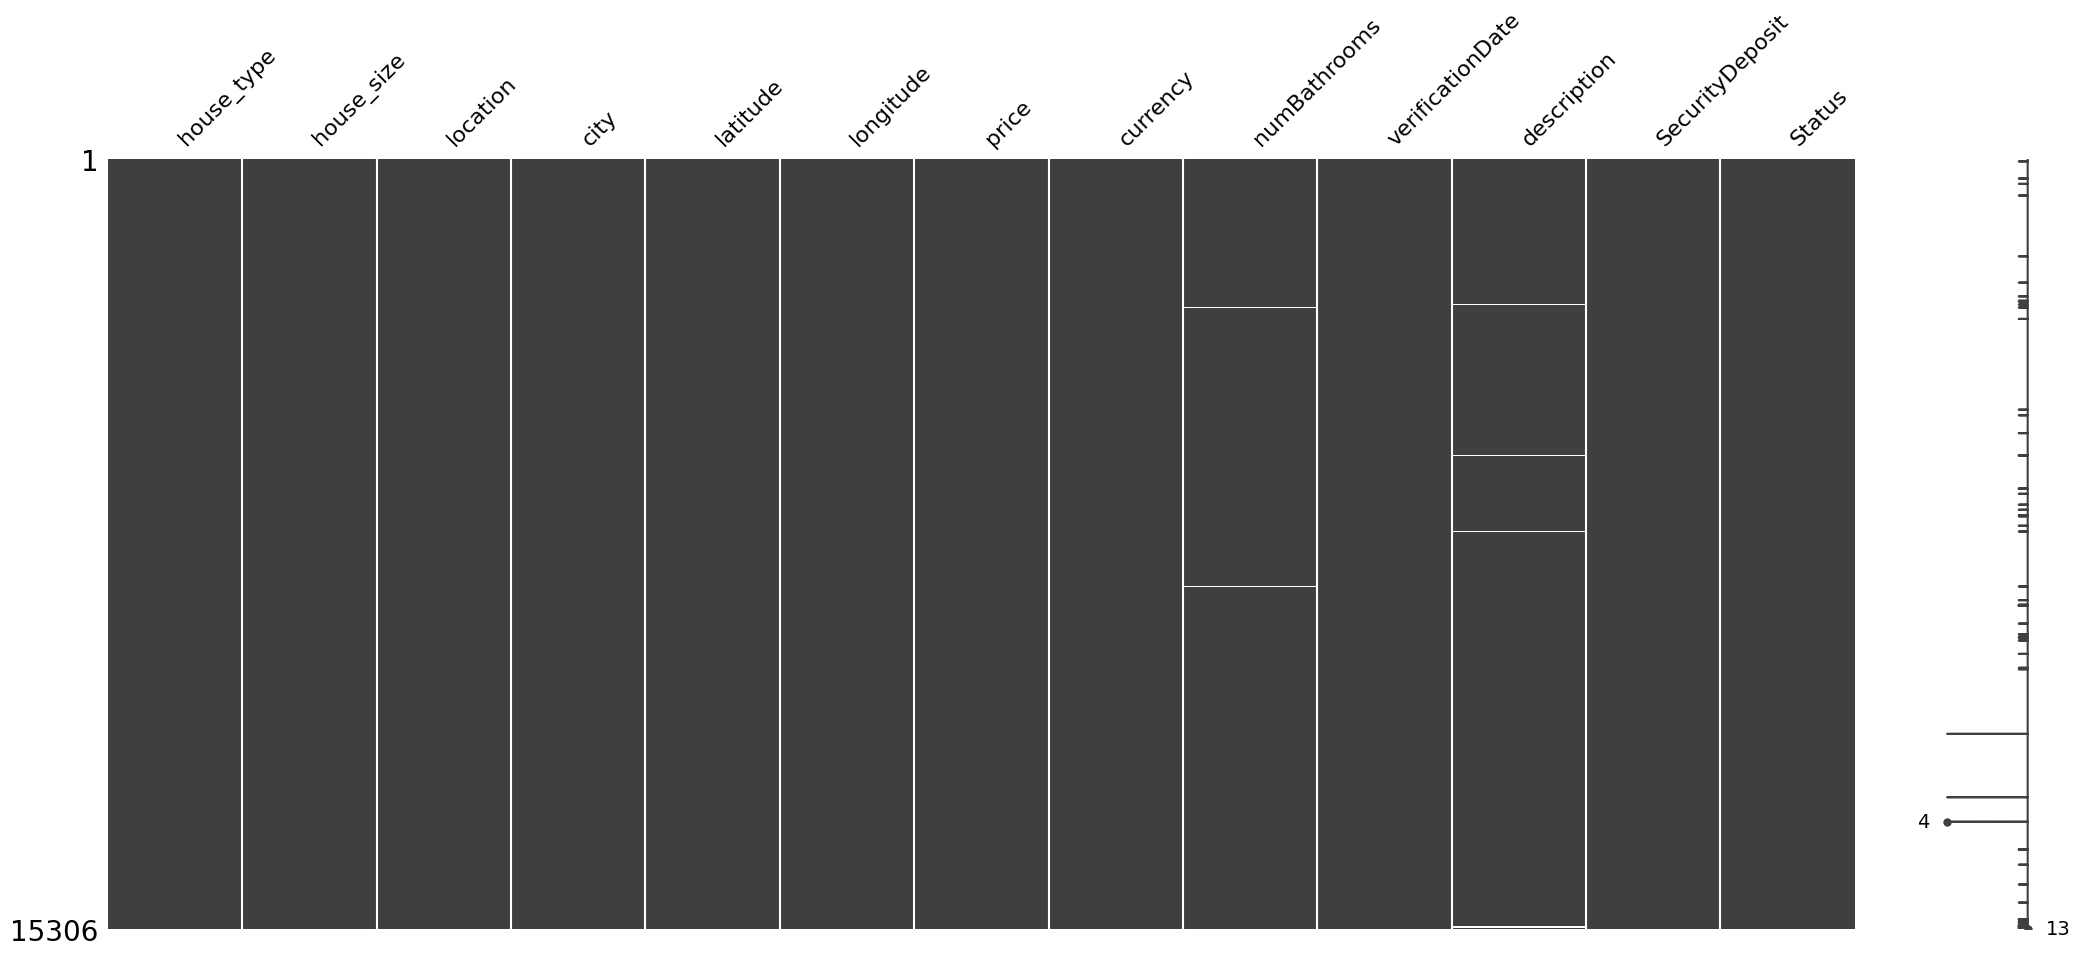

In [113]:
msno.matrix(merged_df)

**PART C: DEALING WITH MISSING VALUES**

**4.3 IDENTIFY FEATURE WITH MISSING VALUE**


---



In [114]:
# Identify features with missing values
vars_with_na = [var for var in merged_df.columns if merged_df[var].isnull().sum() > 0]
vars_with_na

['house_type',
 'house_size',
 'location',
 'city',
 'numBathrooms',
 'verificationDate',
 'description',
 'SecurityDeposit',
 'Status']

In [115]:
# Separate features into categorical and numerical types
categorical_vars_with_na = [var for var in vars_with_na if merged_df[var].dtype == 'O']
numerical_vars_with_na = [var for var in vars_with_na if merged_df[var].dtype != 'O']

In [116]:
print("Categorical features with missing values:", categorical_vars_with_na)
print("Numerical features with missing values:", numerical_vars_with_na)

Categorical features with missing values: ['house_type', 'house_size', 'location', 'city', 'verificationDate', 'description', 'SecurityDeposit', 'Status']
Numerical features with missing values: ['numBathrooms']


In [117]:
# we show the row which house_type column has null value
rows_with_missing_house_type = merged_df[merged_df['house_type'].isnull()]
rows_with_missing_house_type

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,verificationDate,description,SecurityDeposit,Status
11426,NaN,NaN,NaN,NaN,19.132290,72.860413,85000,INR,NaN,NaN,NaN,NaN,NaN
12685,NaN,NaN,NaN,NaN,19.155031,72.855659,78000,INR,NaN,NaN,NaN,NaN,NaN
13173,NaN,NaN,NaN,NaN,19.123636,72.830460,50000,INR,NaN,NaN,NaN,NaN,NaN


**4.4 DROP/DELETE MISSING VALUES**


---



In [118]:
#DELETING THIS ROWS BECAUSE OF MOST OF FEATURE HAS NULL VALLUE
merged_df.dropna(subset=['house_type'], inplace=True)

In [119]:
# Identify features with missing values
vars_with_na = [var for var in merged_df.columns if merged_df[var].isnull().sum() > 0]
print("After deleteing row, features with missing values : " , vars_with_na)

After deleteing row, features with missing values :  ['numBathrooms', 'description']


**4.5 REASON FOR MISSING 74% DESCRIPTION DATA**


---





1. Optional Information
2. Data Entry
3. Data Availability
4. Quality of Listings
5. Purpose of Description

for this reason we fill the NULL value with "unknown"  

In [120]:
# Fill missing values in the 'description' column with the string 'Unknown'
merged_df['description'].fillna('Unknown', inplace=True)

**4.6 IMPUTING NULL VARIABLE numBathrooms**


---



 It is a continuous numerical variable, median imputation would be the most appropriate technique. This is because the median is robust to outliers and provides a reliable estimate of central tendency, making it suitable for numerical variables with skewed distributions or the presence of outliers.

In [121]:
# Impute missing values with the median
merged_df['numBathrooms'].fillna(merged_df['numBathrooms'].median(), inplace=True)


**4.7 CONVERT DATATYPE AND MAKE NEW FEATURE**


---



* Getting appropriate data types. For example baths have a dtype of float, and it contains some decimal values. But it is a quantitative variable. So transforming it to remove decimal.

In [122]:
merged_df['numBathrooms'] = np.ceil(merged_df['numBathrooms'])
merged_df['numBathrooms'] = merged_df['numBathrooms'].astype(int)

* Clean and convert the strings to numeric values

In [123]:
merged_df['house_size'] = merged_df['house_size'].str.replace(' sq ft', '').str.replace(',', '').astype(int)

* Create two new feature num_of_bedrooms,house_type_name in house_type feature

In [124]:
merged_df['num_of_bedrooms'] = merged_df['house_type'].str.extract('(\d+)').astype(int)
merged_df['house_type_name'] = merged_df['house_type'].str.split(n=2).str[2]

<>:1: SyntaxWarning:

invalid escape sequence '\d'

<>:1: SyntaxWarning:

invalid escape sequence '\d'

/var/folders/6g/tp0tqj5n6lv09lb9vtcwcnf40000gn/T/ipykernel_11898/3938739938.py:1: SyntaxWarning:

invalid escape sequence '\d'



In [125]:
# Drop the original 'house_type' column
merged_df.drop(columns=['house_type'], inplace=True)

**4.8 CHECKING ANY OUTLIER**


---



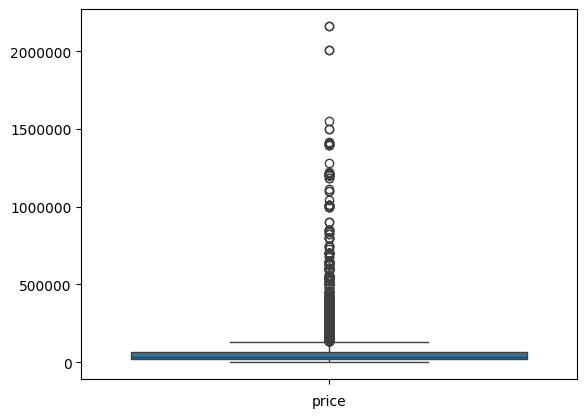

In [126]:
plt.ticklabel_format(style='plain')
sns.boxplot(x=None, y=merged_df['price'], data=merged_df)
plt.xlabel("price")
plt.ylabel("")
plt.show()

Statistical Analysis: As we can see, there is outlier in the data, so, we will remove them

**4.9 Removing Outliers**


---



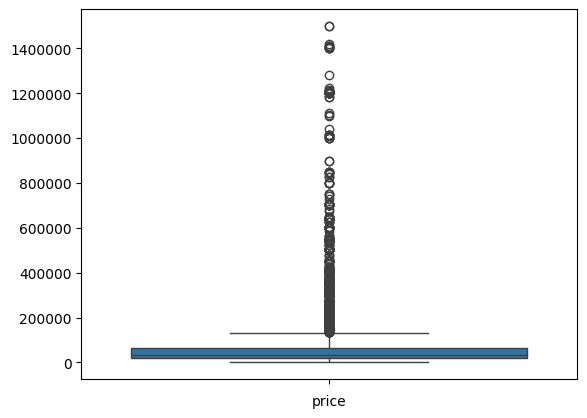

In [127]:
merged_df = merged_df[merged_df['price'] <= 1500000]

plt.ticklabel_format(style='plain')
sns.boxplot(x=None, y=merged_df['price'], data=merged_df)
plt.xlabel("price")
plt.ylabel("")
plt.show()

# **5 DATA VISUALIZATION**

There will be two type of analysis.

* Univariate (analyzing a single attribute)
* Multivariate (analyzing an attribute with the target attribute).

### **5.1 UNIVARIATE ANALYSIS**

#### **Numerical Data**

In [128]:
# Analyze each numerical feature individually
numerical_features = ['house_size', 'latitude', 'longitude', 'price', 'numBathrooms']

In [129]:
# Calculate summary statistics
merged_df[numerical_features].describe()

,house_size,latitude,longitude,price,numBathrooms
count,15298.000000,15298.000000,15298.000000,1.529800e+04,15298.000000
mean,1508.710616,21.249160,77.280361,6.923554e+04,2.246568
std,1244.534388,5.335704,4.872965,1.138820e+05,0.978154
min,150.000000,11.351545,72.320129,2.000000e+03,1.000000
25%,800.000000,18.970388,72.941322,2.000000e+04,2.000000
50%,1163.000000,19.258623,77.165047,3.500000e+04,2.000000
75%,1761.000000,28.500750,77.695261,6.500000e+04,3.000000
max,16000.000000,30.888254,91.792137,1.500000e+06,11.000000


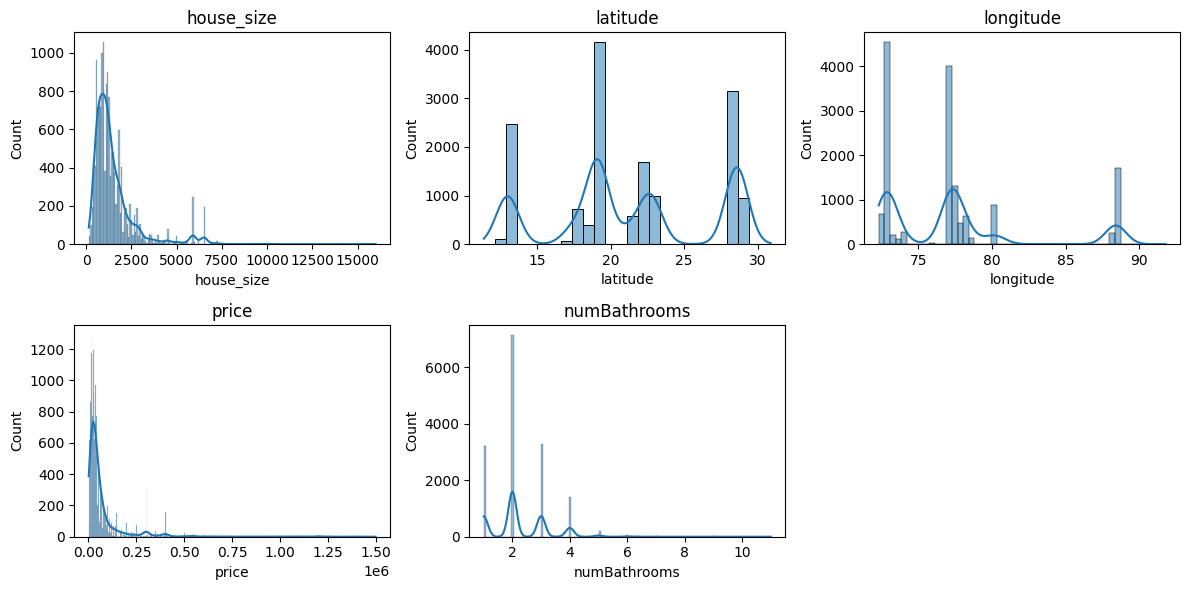

In [130]:
# Histograms
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(merged_df[feature], kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()


* We notice that our numerical values do not follow a normal distribution. Therefore, we aim to transform our numerical values to  a normal distribution.

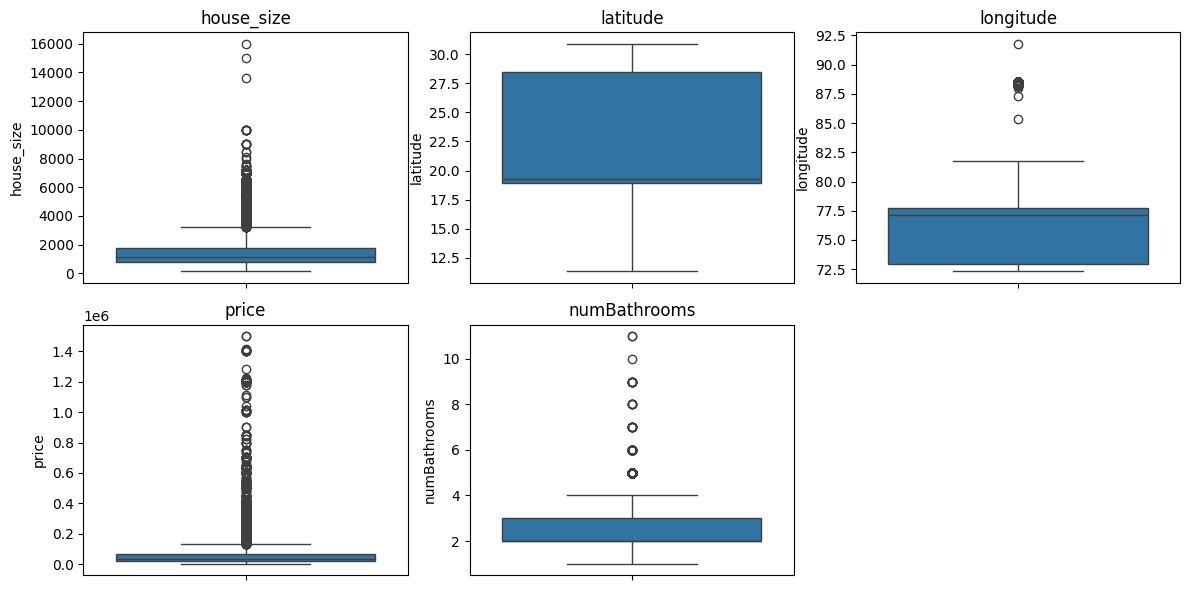

In [131]:
# Box plots
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=merged_df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

Comparison of Price Distribution for Different Types of Residential Properties

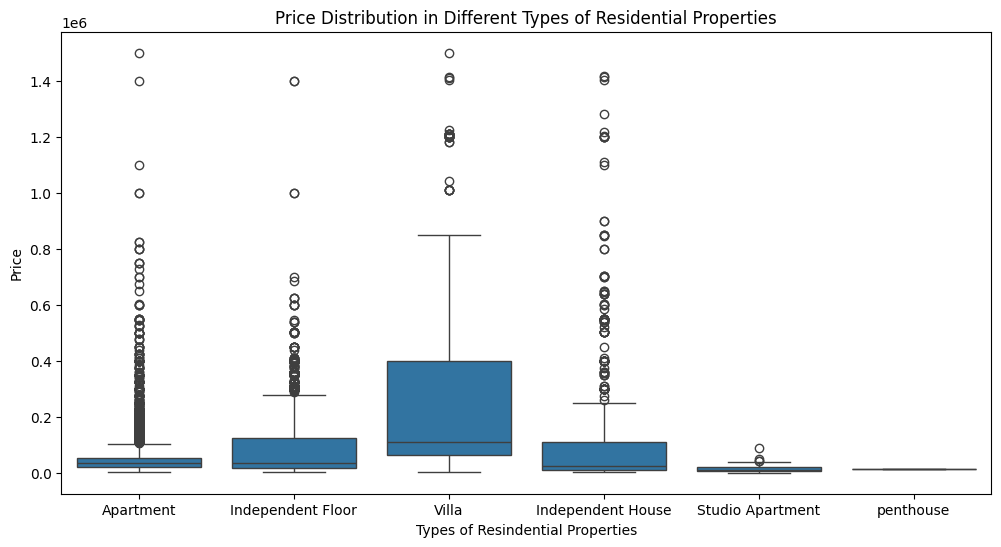

In [132]:
# Box plot for Price Distribution in Different Types of Residential Properties
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='house_type_name', y='price')
plt.title("Price Distribution in Different Types of Residential Properties")
plt.xlabel("Types of Resindential Properties")
plt.ylabel("Price")
plt.show()


* The data map depicts several types of residential properties, including apartments, independent floors, villas, independent houses, studio apartments, and penthouses. Observations show a negative skew across all categories of attributes. However, villas have a significantly wider interquartile range (IQR) than the rest.
* Apartments, separate floors, and studio apartments have particularly low IQRs. Furthermore, studio flats and penthouses have significantly narrow ranges, distinguishing them from other property categories.

#### **Categorical Data**

In [133]:
# Analyze each categorical feature individually
categorical_features = ['city', 'currency', 'Status']

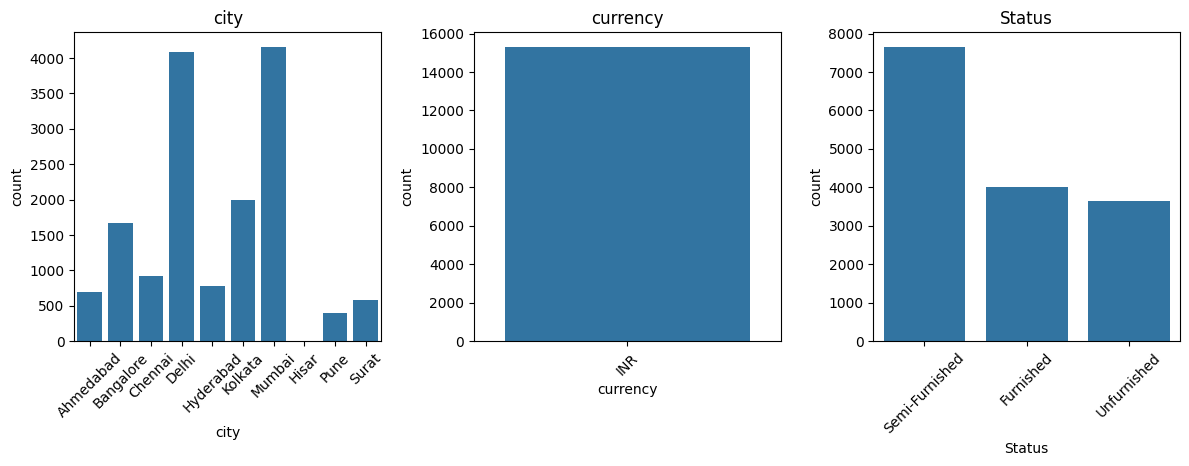

In [134]:
# Count plots
plt.figure(figsize=(12, 8))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=merged_df, x=feature)
    plt.title(feature)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


* Based on the graph study, Delhi and Mumbai have the highest number of rental flats, followed by Bangalore. In contrast, Pune, Surat, and Ahmedabad have the lowest availability of rental units among the cities examined.
* The data shows that semi-furnished flats are in higher demand than furnished and unfurnished flats, indicating that consumers prefer to buy semi-furnished homes.

### **5.2 MULTIVARIATE ANALYSIS**

####**Numerical Data**

<Figure size 1000x800 with 0 Axes>

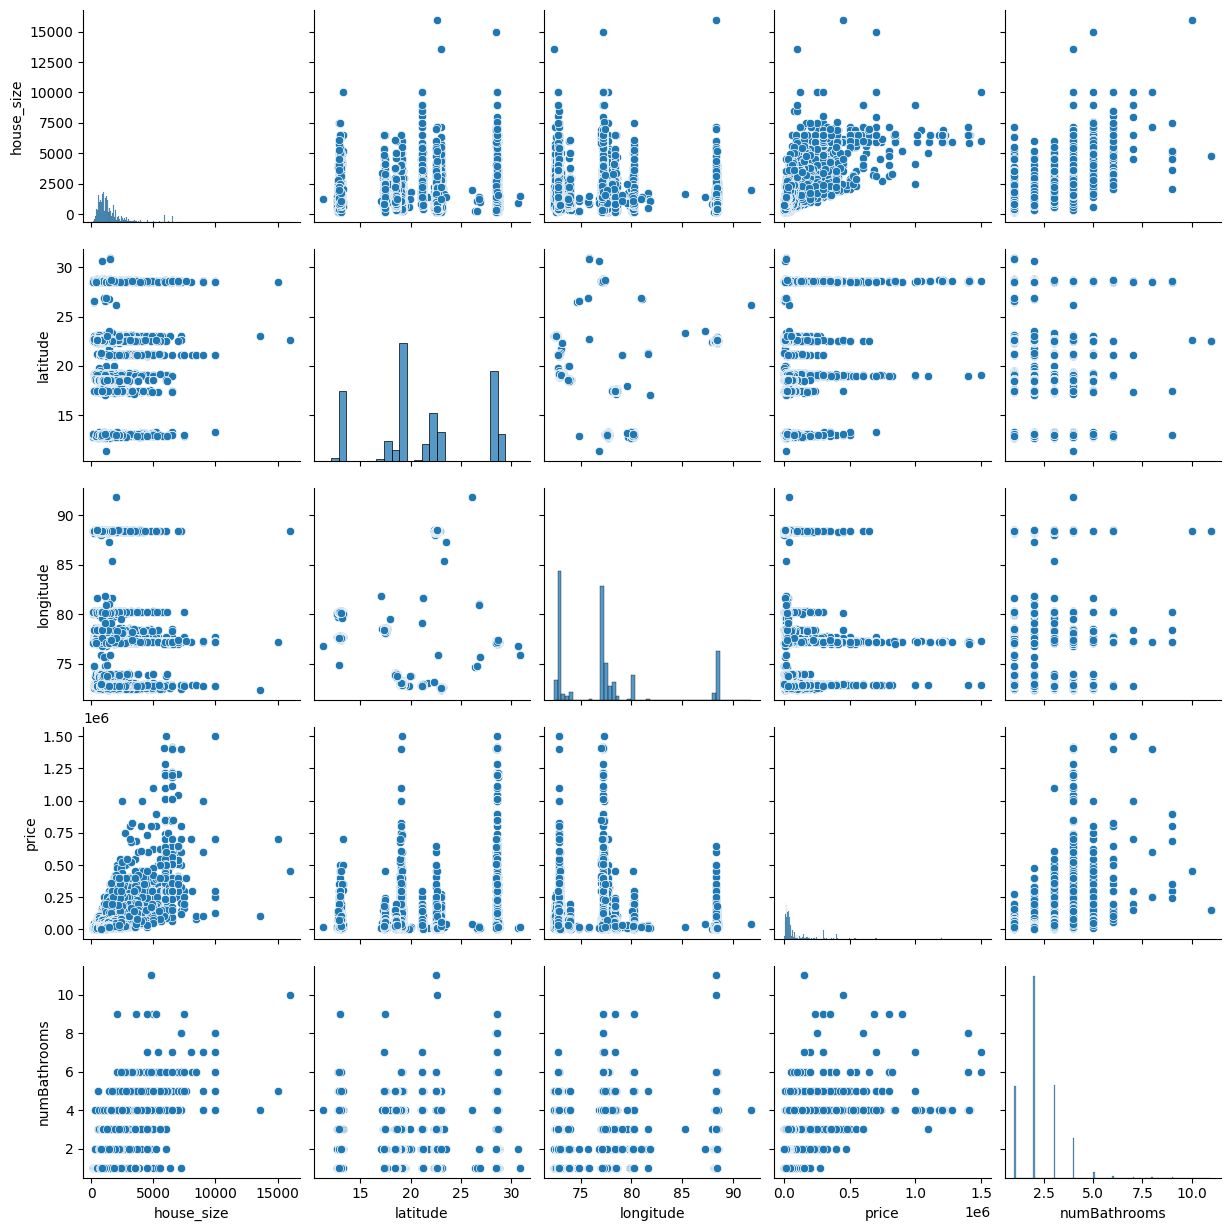

In [135]:
# Pairwise relationships between numerical features

plt.figure(figsize=(10, 8))
sns.pairplot(merged_df[numerical_features])
plt.show()

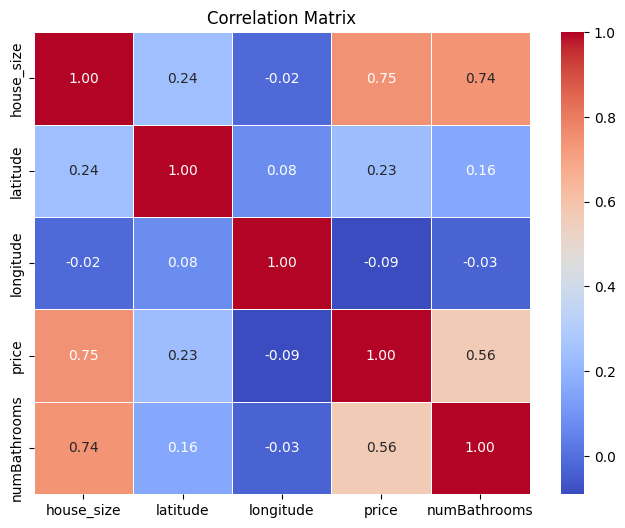

In [136]:
# Correlation matrix
correlation_matrix = merged_df[numerical_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

* The correlation matrix shows that house size and price are strongly associated
* As from the above results, the overall size of the
house is a more crucial element in pricing

#### **Categorical Data**

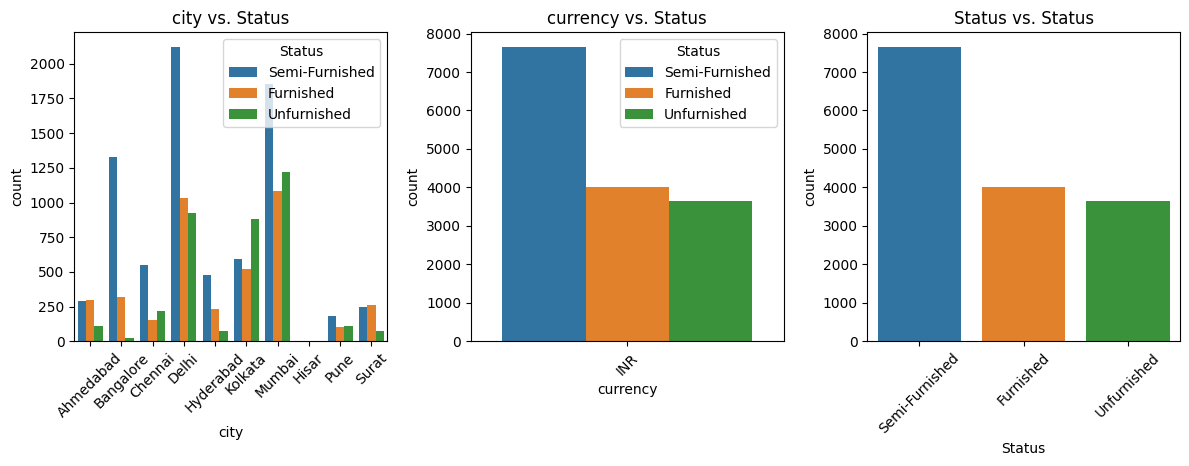

In [137]:
# Grouped bar plot for categorical features

plt.figure(figsize=(12, 8))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=merged_df, x=feature, hue='Status')
    plt.title(f"{feature} vs. Status")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the graph, we can infer that Delhi has the largest demand for rental apartments and that the desire for semi-furnished apartments is higher than that for furnished apartments. Mumbai and Bangalore are the next two most popular cities in demand for apartment rentals, although Pune has the lowest demand overall

### **5.3 BAR GRAPH**

**First, we compare our output (price) feature to all other numerical and categorical features in our data.**

What is the average price of houses in different cities ?

/var/folders/6g/tp0tqj5n6lv09lb9vtcwcnf40000gn/T/ipykernel_11898/1924343188.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




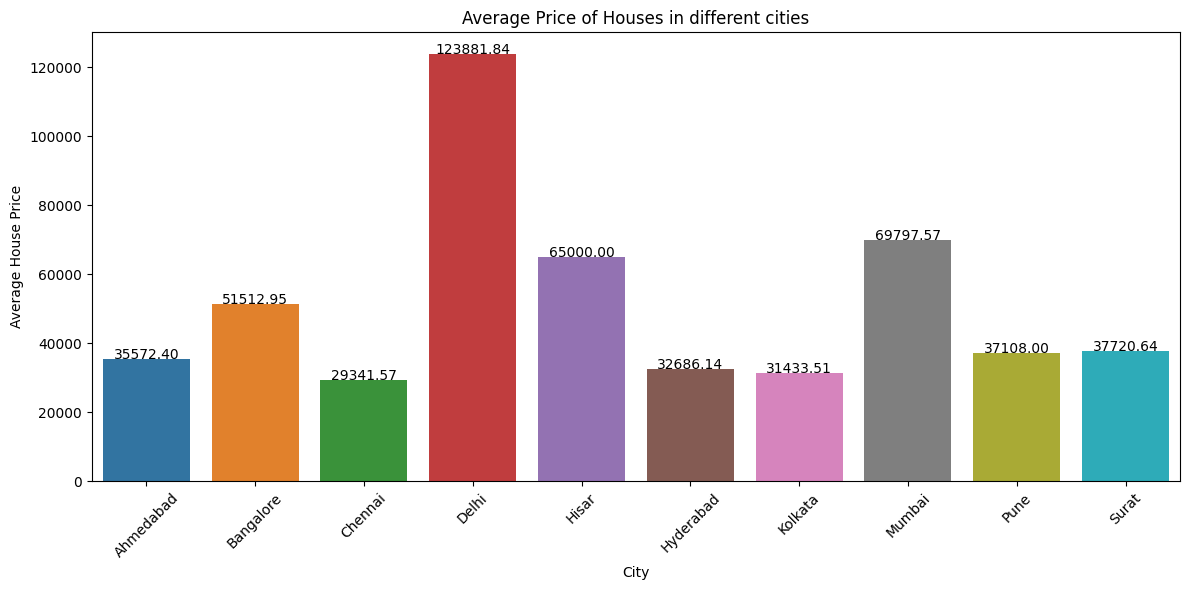

In [138]:
# Calculate average house price by city
avg_price_by_city = merged_df.groupby('city')['price'].mean().reset_index()

# Get counts of houses by city
house_counts = merged_df['city'].value_counts().reset_index()
house_counts.columns = ['city', 'count']

# Merge average price and house count DataFrames
avg_price_counts = pd.merge(avg_price_by_city, house_counts, on='city')

# Define custom color palette
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Create bar plot using Seaborn with custom color palette
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price_counts, x='city', y='price', palette=custom_palette)
plt.title('Average Price of Houses in different cities')
plt.xlabel('City')
plt.ylabel('Average House Price')
plt.xticks(rotation=45)

# Annotate bars with both average price and counts
for index, row in avg_price_counts.iterrows():
    plt.text(index, row['price'], f'{row["price"]:.2f}', color='black', ha="center")

plt.tight_layout()
plt.show()



* The graph indicates that there is a greater demand for rental homes in Delhi, which may be the cause of the highest home prices. The graph also shows that Mumbai City has the second-highest rental prices.



What are the Average houses prices of various types of residential properties ?

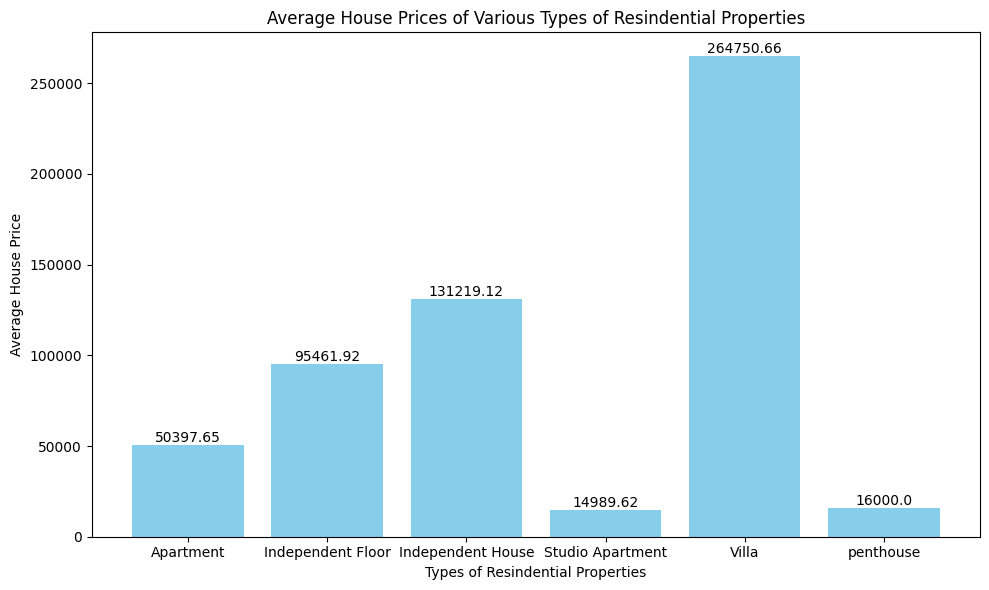

In [139]:
# Group the DataFrame by 'house_type_name' and calculate the average house price for each group
avg_price_by_house_type = merged_df.groupby('house_type_name')['price'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(avg_price_by_house_type['house_type_name'], avg_price_by_house_type['price'], color='skyblue')
plt.title('Average House Prices of Various Types of Resindential Properties')
plt.xlabel('Types of Resindential Properties')
plt.ylabel('Average House Price')
plt.xticks(avg_price_by_house_type['house_type_name'])

# Annotate each bar with the average house price
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()


* Villa has the highest average price of 264750 among the various types of residential properties, followed by independent houses with an average price of 131219.



What are the average house prices based on the number of bedrooms?

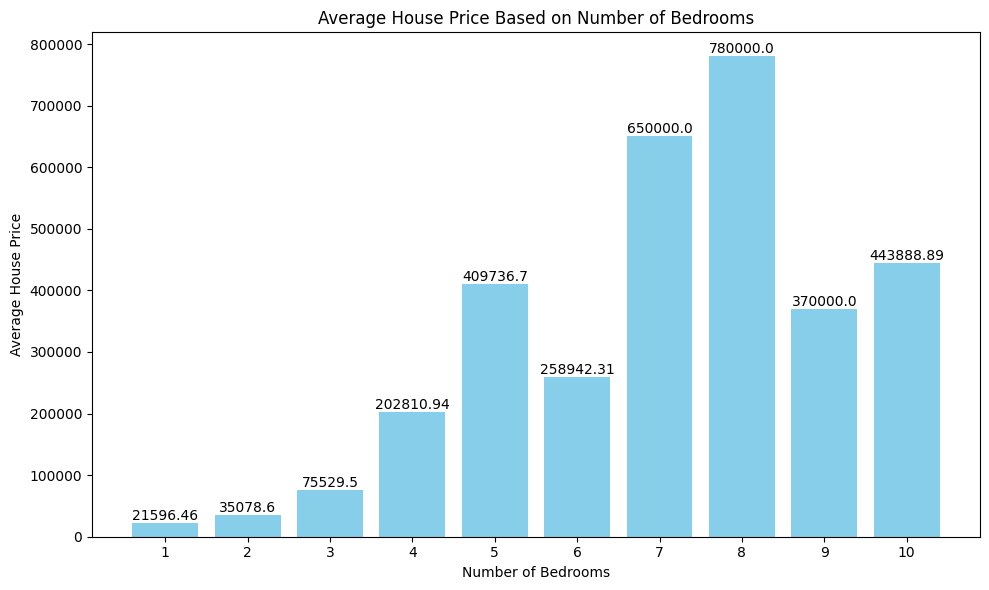

In [140]:
# Group the DataFrame by 'num_bedrooms' and calculate the average house price for each group
avg_price_by_bedrooms = merged_df.groupby('num_of_bedrooms')['price'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(avg_price_by_bedrooms['num_of_bedrooms'], avg_price_by_bedrooms['price'], color='skyblue')
plt.title('Average House Price Based on Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average House Price')
plt.xticks(avg_price_by_bedrooms['num_of_bedrooms'])

# Annotate each bar with the average house price
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()


* Based on our observations, we can conclude that the number of bedrooms significantly impacts the price. Notably, eight bedrooms have the highest average rental price of 780000.

What are the average house prices based on the size of the house ?

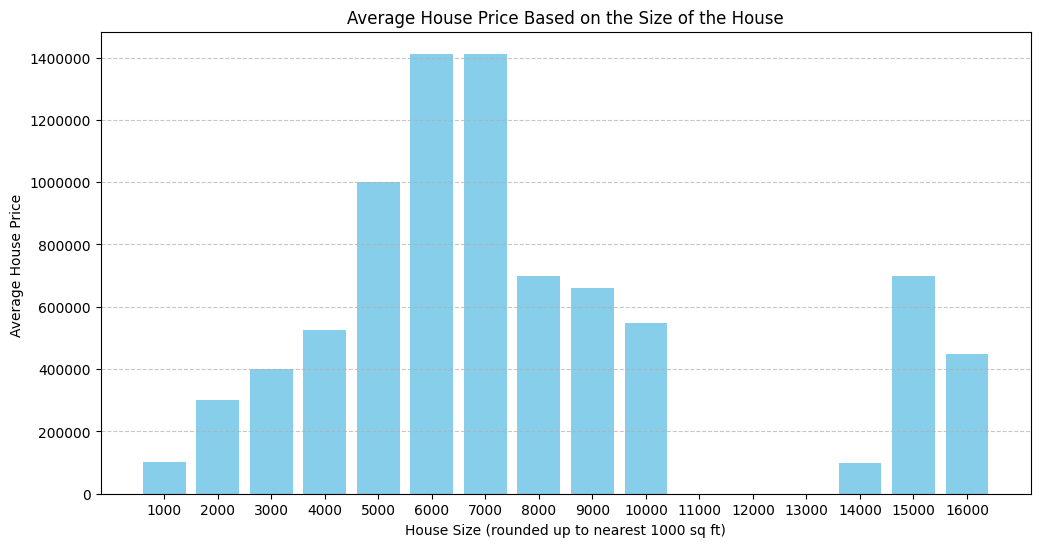

In [141]:
# Original Data
avg_price_by_house_size = merged_df.groupby('house_size')['price'].mean().reset_index()

# Rounding up house sizes to the nearest 1000 sq ft
rounded_sizes = [int(np.ceil(size / 1000.0)) * 1000 for size in avg_price_by_house_size['house_size']]

# Plotting the bar plot
plt.figure(figsize=(12, 6))  # Adjusted figure size
bars = plt.bar(rounded_sizes, avg_price_by_house_size['price'], color='skyblue', width=800)

# Disable scientific notation for y-axis
plt.ticklabel_format(style='plain', axis='y')

# Adding labels and title
plt.xlabel('House Size (rounded up to nearest 1000 sq ft)')
plt.ylabel('Average House Price ')
plt.title('Average House Price Based on the Size of the House')

# Showing the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(np.arange(min(rounded_sizes), max(rounded_sizes)+1, 1000))  # Set x-ticks at intervals of 1000 sq ft
plt.show()


* It is evident from the graph that a particular range of dwelling areas attracts a high level of demand in the rental market. In particular, the most expensive average rental costs are seen in homes between 6000 and 7000 square feet. Furthermore, there is still a significant demand for homes that are 5000 square feet.


How many houses are available in each city?

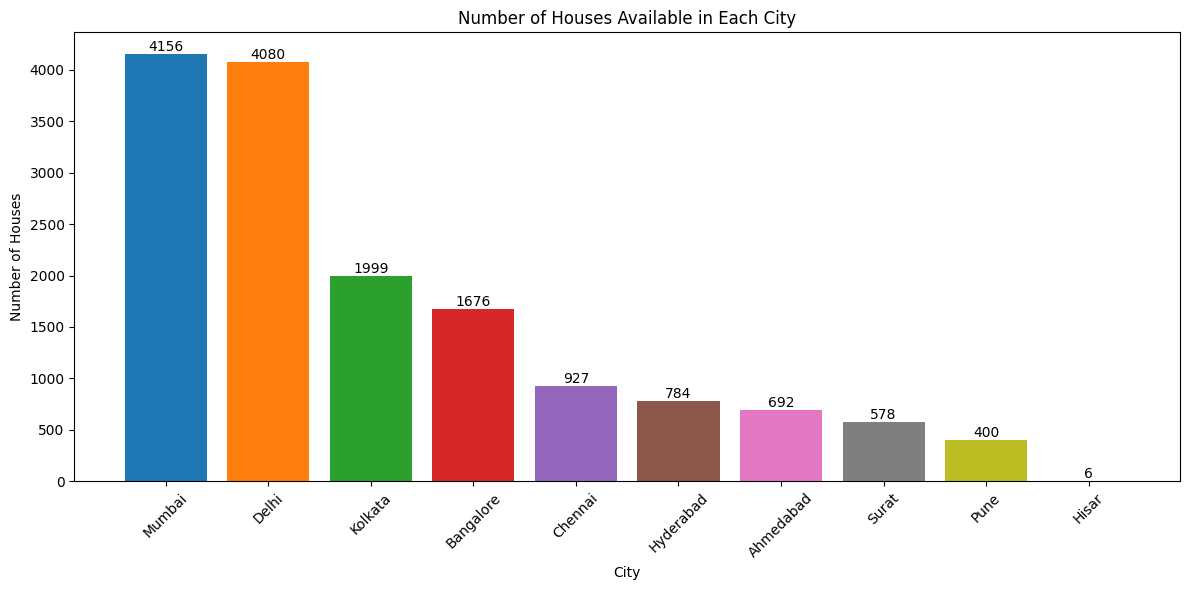

In [142]:
house_count_by_city = merged_df['city'].value_counts().reset_index()
house_count_by_city.columns = ['city', 'house_count']

# Define custom color palette
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Create bar plot with custom colors
plt.figure(figsize=(12, 6))
bars = plt.bar(house_count_by_city['city'], house_count_by_city['house_count'], color=custom_palette)

# Add counts on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

# Customize plot
plt.title('Number of Houses Available in Each City')
plt.xlabel('City')
plt.ylabel('Number of Houses')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* We can notice that there are more available homes in Delhi and Mumbai, which increases demand for rental housing overall.

How does the number of bedrooms vary across the houses in the dataset?

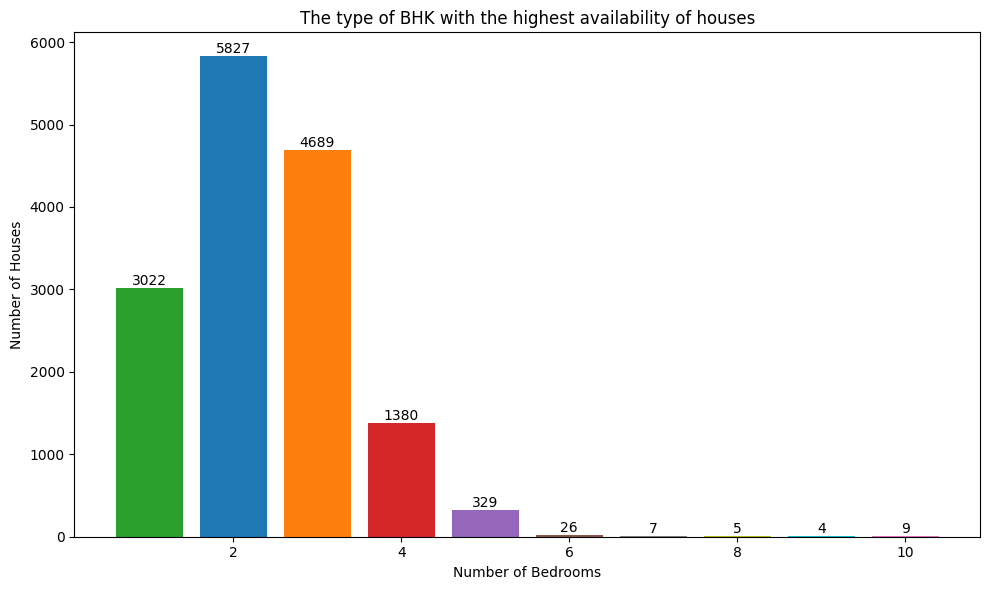

In [143]:
bedroom_count = merged_df['num_of_bedrooms'].value_counts().reset_index()
bedroom_count.columns = ['num_of_bedrooms', 'count']

# Define custom color palette
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Create bar chart with custom colors
plt.figure(figsize=(10, 6))
bars = plt.bar(bedroom_count['num_of_bedrooms'], bedroom_count['count'], color=custom_palette)

# Add counts on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

# Customize plot
plt.title('The type of BHK with the highest availability of houses')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Number of Houses')

plt.tight_layout()
plt.show()

* We can have remarkable insights from the graph that there is a higher demand for 2BHK houses for rental compared to others. Followed by 3BHK.


How many houses are available with a deposit, and how many are available without a deposit?

In [144]:
no_deposit_count = merged_df['SecurityDeposit'].value_counts().get("No Deposit", 0)
print("Number of 'No Deposit' values in SecurityDeposit column :", no_deposit_count)

Number of 'No Deposit' values in SecurityDeposit column : 10413


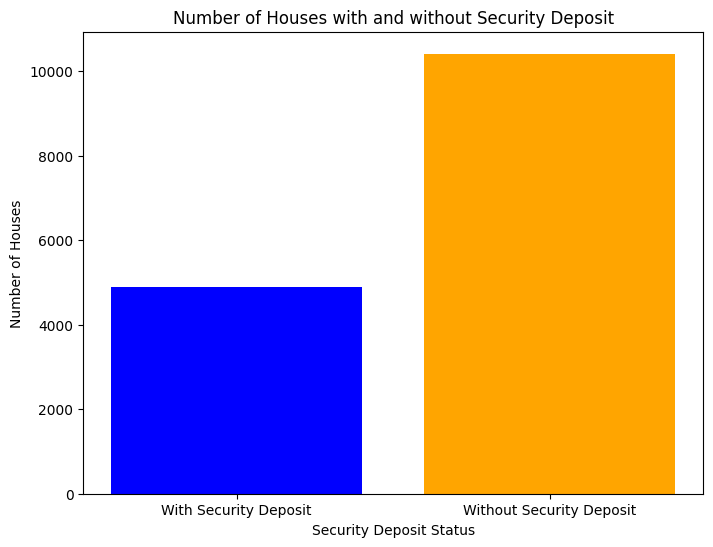

In [145]:
labels = ['With Security Deposit', 'Without Security Deposit']
counts = [len(merged_df)-no_deposit_count, no_deposit_count]

# Plot
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['blue', 'orange'])
plt.title('Number of Houses with and without Security Deposit')
plt.xlabel('Security Deposit Status')
plt.ylabel('Number of Houses')
plt.show()

In our dataset, out of the total number of houses listed, 4,893 houses have collected a security deposit from tenants, while 10,413 house owners have chosen not to collect any security deposit.

### **5.4 SCATTER PLOT**

How the price of houses varies with their size in different cities?

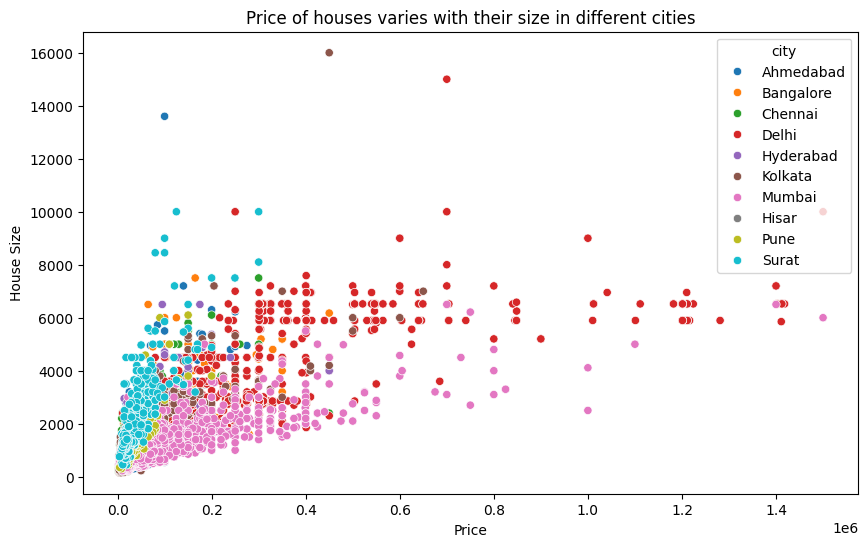

In [146]:
# Scatter plot for Price vs. House Size features
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='price', y='house_size', hue='city')
plt.title("Price of houses varies with their size in different cities")
plt.xlabel("Price")
plt.ylabel("House Size")
plt.show()

* As we can see, the majority of possible housing sizes fall between 0 and 6000 square feet. Additionally, the majority of the data are concentrated in the price range of 0 to 4 lakh and the home range of 0 to 4000 square feet.
* We can therefore conclude that there is a need for homes in India’s metropolitan areas, although at a restricted price range and square feet.

### **5.5 PIE CHART**

What is the average price distribution based on residential properties?

In [147]:
import plotly.express as px
grdsp = merged_df.groupby(["house_type_name"])[["price"]].mean().reset_index()

fig = px.pie(grdsp,
             values="price",
             names="house_type_name",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

* We can see that the majority of the houses are of type Villa with around 46.2% of the total records.

* The mean price for the type Villa is around 2,76,399.

What is the average price distribution based on the status of houses?

In [148]:
import plotly.express as px

# Grouping by house status and calculating the average price
grdsp = merged_df.groupby(["Status"])[["price"]].mean().reset_index()

# Creating the pie chart
fig = px.pie(grdsp,
             values="price",
             names="Status",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()


* According to the pie chart, unfurnished properties make up the largest portion of the rental housing market.


In [149]:
merged_df.head(3)

,house_size,location,city,latitude,longitude,price,currency,numBathrooms,verificationDate,description,SecurityDeposit,Status,num_of_bedrooms,house_type_name
0,1517,Sanathal,Ahmedabad,22.974880,72.456947,50000,INR,2,Posted a year ago,It’s a 3 bhk multistorey apartment situated in...,No Deposit,Semi-Furnished,3,Apartment
1,540,Maninagar,Ahmedabad,22.990902,72.607094,10000,INR,1,Posted 3 years ago,It’s a 1 bhk multistorey apartment situated in...,No Deposit,Furnished,1,Apartment
2,1860,Shela,Ahmedabad,22.995766,72.467430,45000,INR,3,Posted a month ago,Well designed 3 bhk multistorey apartment is a...,No Deposit,Furnished,3,Apartment


### **5.6 GEOGRAPHICAL VARIABLES**

* Plotting lattitude and longitude to get more insights

/var/folders/6g/tp0tqj5n6lv09lb9vtcwcnf40000gn/T/ipykernel_11898/4045992656.py:15: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



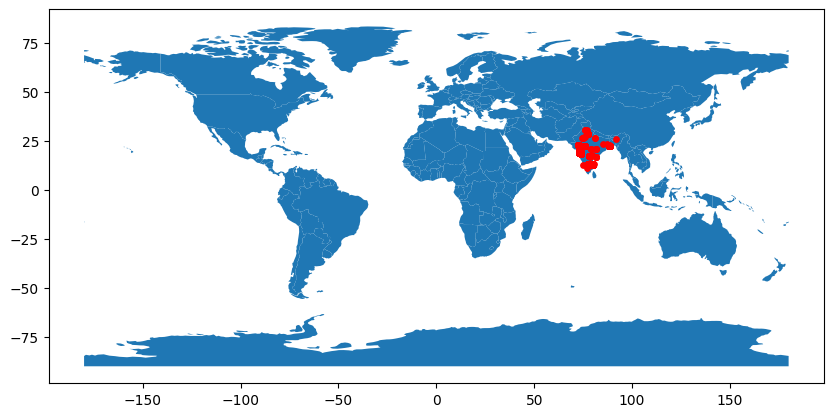

In [150]:
# For any error related to package installation, run the following command:
# pip install shapely
# pip install geopandas
# pip install --upgrade nbformat

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


geometry = [Point(xy) for xy in zip(merged_df['longitude'], merged_df['latitude'])]
gdf = GeoDataFrame(merged_df, geometry=geometry)

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

* In the above map, the red dots show the latitude and longitude of the 9 metropolitan cities of India.

In [151]:
merged_df.head(3)

,house_size,location,city,latitude,longitude,price,currency,numBathrooms,verificationDate,description,SecurityDeposit,Status,num_of_bedrooms,house_type_name
0,1517,Sanathal,Ahmedabad,22.974880,72.456947,50000,INR,2,Posted a year ago,It’s a 3 bhk multistorey apartment situated in...,No Deposit,Semi-Furnished,3,Apartment
1,540,Maninagar,Ahmedabad,22.990902,72.607094,10000,INR,1,Posted 3 years ago,It’s a 1 bhk multistorey apartment situated in...,No Deposit,Furnished,1,Apartment
2,1860,Shela,Ahmedabad,22.995766,72.467430,45000,INR,3,Posted a month ago,Well designed 3 bhk multistorey apartment is a...,No Deposit,Furnished,3,Apartment


# **6 FEATURE ENGINEERING**

**6.1
TRANSFORMING DATA WITH TWO COLUMNS TO CREATE A FEATURE**


---



In [152]:
merged_df['premium_house'] = np.where((merged_df['numBathrooms']>=merged_df['num_of_bedrooms'])&(merged_df['num_of_bedrooms']>1),1,0)
merged_df['beds_per_sqfeet'] = merged_df['num_of_bedrooms'] / merged_df['house_size']
merged_df['baths_per_beds'] = merged_df['numBathrooms'] / merged_df['num_of_bedrooms']

**6.2 FEATURE EXTRACT ON DESCRIPTION**


---



* Exploring 'description' column

In [153]:
merged_df.description[1200].lower()

'a spacious 3 bhk multistorey apartment is available for rental in bhavya constructions pristine, bellandur, bangalore. it has a built-up area of 1770 sqft and is available for rent at rs. 60,000 per month . it is a 10 year old ready-to-move-in property. it is made in way to provide a comfortable living for the residents. it is situated in the proximity of all the important facilities. if you are interested, please contact us for more details. '

In [154]:
[x in merged_df.description[1200].lower() for x in ['pool', 'swimming','wi-fi','fireplace','grilling','gym','fence', 'court']]

[False, False, False, False, False, False, False, False]



*   creating Features from description



In [155]:
merged_df['has_pool'] = merged_df['description'].apply(lambda x: 1 if 'pool' in x.lower() or 'swimming' in x.lower() else 0)
merged_df['gym_nearby'] = merged_df['description'].apply(lambda x: 1 if 'gym' in x.lower() or 'fitness' in x.lower() else 0)
merged_df['school/clg_nearby'] = merged_df['description'].apply(lambda x: 1 if 'school' in x.lower() or 'college' in x.lower() else 0)
merged_df['wifi_facilities'] = merged_df['description'].apply(lambda x: 1 if 'wifi' in x.lower() or 'wi-fi' in x.lower() else 0)
merged_df['valet_service'] = merged_df['description'].apply(lambda x: 1 if 'valet' in x.lower() else 0)
merged_df['shopping_nearby'] = merged_df['description'].apply(lambda x: 1 if 'shopping' in x.lower() else 0)
merged_df['sports_playground'] = merged_df['description'].apply(lambda x: 1 if 'sport' in x.lower()  or 'sports' in x.lower()
                                                      or 'tennis' in x.lower() or 'soccer' in x.lower()
                                                      or 'soccers' in x.lower() or 'court' in x.lower() else 0)
merged_df['dining_nearby'] = merged_df['description'].apply(lambda x: 1 if 'dining' in x.lower() else 0)

In [156]:
merged_df.columns

Index(['house_size', 'location', 'city', 'latitude', 'longitude', 'price',
       'currency', 'numBathrooms', 'verificationDate', 'description',
       'SecurityDeposit', 'Status', 'num_of_bedrooms', 'house_type_name',
       'premium_house', 'beds_per_sqfeet', 'baths_per_beds', 'has_pool',
       'gym_nearby', 'school/clg_nearby', 'wifi_facilities', 'valet_service',
       'shopping_nearby', 'sports_playground', 'dining_nearby'],
      dtype='object')

In [157]:
for feature in ['has_pool', 'gym_nearby', 'school/clg_nearby', 'wifi_facilities', 'valet_service',
            'shopping_nearby', 'sports_playground', 'dining_nearby']:
    print(f"Counts for {feature}:")
    print(merged_df[feature].value_counts())
    print()


Counts for has_pool:
has_pool
0    14615
1      683
Name: count, dtype: int64

Counts for gym_nearby:
gym_nearby
0    14300
1      998
Name: count, dtype: int64

Counts for school/clg_nearby:
school/clg_nearby
0    14748
1      550
Name: count, dtype: int64

Counts for wifi_facilities:
wifi_facilities
0    15070
1      228
Name: count, dtype: int64

Counts for valet_service:
valet_service
0    15298
Name: count, dtype: int64

Counts for shopping_nearby:
shopping_nearby
0    15236
1       62
Name: count, dtype: int64

Counts for sports_playground:
sports_playground
0    12711
1     2587
Name: count, dtype: int64

Counts for dining_nearby:
dining_nearby
0    14523
1      775
Name: count, dtype: int64



**6.3 NUMERICAL VARIABLE TRANSFORMATION**


---



We will log transform the positive numerical variables in order to get a more Gaussian-like distribution. This tends to help Linear machine learning models.

In [158]:
for var in ['price','house_size','baths_per_beds','beds_per_sqfeet']:
    merged_df[var] = np.log(merged_df[var])

In [159]:
# check that data set does not contain null values in the engineered variables
[var for var in ['price','house_size','baths_per_beds','beds_per_sqfeet'] if merged_df[var].isnull().sum() > 0]

[]

**6.4 CATEGORICAL VARIABLE TRANSFORMATION**


---



* Encoding of categorical variables

Next, we need to transform the strings of the categorical variables into numbers. We will do it so that we capture the monotonic relationship between the label and the target.

In [160]:

def replace_categories(df, feature, output):
    ordered_labels = df.groupby([feature])[output].mean().sort_values().index
    ordinal_label = {k: i for i, k in enumerate(ordered_labels, 0)}
    df[var] = df[feature].map(ordinal_label)

Categorical_features = ['city', 'currency', 'Status','location','house_type_name']
for var in Categorical_features:
    replace_categories(merged_df, var, 'price')


In [161]:
Categorical_features = ['city', 'currency', 'Status','location','house_type_name']

In [162]:
for var in Categorical_features:
    replace_categories(merged_df, var, 'price')

In [163]:
final_features = ["house_size",	"location",	"city",	"latitude"	,"longitude"	,"price","numBathrooms","Status","num_of_bedrooms","house_type_name","premium_house","beds_per_sqfeet" ,"baths_per_beds","has_pool"	,"gym_nearby","school/clg_nearby","wifi_facilities","valet_service","shopping_nearby","sports_playground","dining_nearby"]

**6.5 CREATE FINAL DATASET**


---



In [164]:
final_dataset = merged_df[final_features].copy()
final_dataset.head()

,house_size,location,city,latitude,longitude,price,numBathrooms,Status,num_of_bedrooms,house_type_name,...,beds_per_sqfeet,baths_per_beds,has_pool,gym_nearby,school/clg_nearby,wifi_facilities,valet_service,shopping_nearby,sports_playground,dining_nearby
0,7.324490,1003,3,22.974880,72.456947,10.819778,2,0,3,2,...,-6.225878,-0.405465,0,0,0,0,0,0,1,0
1,6.291569,130,3,22.990902,72.607094,9.210340,1,2,1,2,...,-6.291569,0.000000,0,0,0,0,0,0,0,0
2,7.528332,735,3,22.995766,72.467430,10.714418,3,2,3,2,...,-6.429719,0.000000,0,0,0,0,0,0,0,0
3,6.652863,416,3,19.216536,73.087166,9.680344,2,0,1,2,...,-6.652863,0.693147,0,0,0,0,0,0,0,0
4,6.522093,96,3,22.978258,72.600227,9.047821,1,0,1,4,...,-6.522093,0.000000,0,0,0,0,0,0,1,0


In [165]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15298 entries, 0 to 15305
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   house_size         15298 non-null  float64
 1   location           15298 non-null  int64  
 2   city               15298 non-null  int64  
 3   latitude           15298 non-null  float64
 4   longitude          15298 non-null  float64
 5   price              15298 non-null  float64
 6   numBathrooms       15298 non-null  int64  
 7   Status             15298 non-null  int64  
 8   num_of_bedrooms    15298 non-null  int64  
 9   house_type_name    15298 non-null  int64  
 10  premium_house      15298 non-null  int64  
 11  beds_per_sqfeet    15298 non-null  float64
 12  baths_per_beds     15298 non-null  float64
 13  has_pool           15298 non-null  int64  
 14  gym_nearby         15298 non-null  int64  
 15  school/clg_nearby  15298 non-null  int64  
 16  wifi_facilities    15298 no

In [166]:
final_dataset.shape

(15298, 21)

# **7 MODEL BUILDING**

In [167]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

* we use this new dataset for prediction

In [168]:
final_dataset.head(3)

,house_size,location,city,latitude,longitude,price,numBathrooms,Status,num_of_bedrooms,house_type_name,...,beds_per_sqfeet,baths_per_beds,has_pool,gym_nearby,school/clg_nearby,wifi_facilities,valet_service,shopping_nearby,sports_playground,dining_nearby
0,7.324490,1003,3,22.974880,72.456947,10.819778,2,0,3,2,...,-6.225878,-0.405465,0,0,0,0,0,0,1,0
1,6.291569,130,3,22.990902,72.607094,9.210340,1,2,1,2,...,-6.291569,0.000000,0,0,0,0,0,0,0,0
2,7.528332,735,3,22.995766,72.467430,10.714418,3,2,3,2,...,-6.429719,0.000000,0,0,0,0,0,0,0,0


In [169]:
final_dataset.to_csv('data_cleaned.csv', index=False)

## **7.1 SPLIT OUR DATA**


---





*   Without Scaling



In [170]:
# Separate features and target variable
X = final_dataset.drop(columns=['price'])
y = final_dataset['price']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [171]:
X_test.shape

(3060, 20)

In [172]:
y_test.shape

(3060,)

* With Scaling

In [173]:
sc = StandardScaler()

X1_train = sc.fit_transform(X_train)
X1_test = sc.fit_transform(X_test)
y1_train = y_train
y1_test = y_test

## **7.2 BUILT MODEL**


---



####**7.2.1 Linear Regression**

In [174]:
# Initialize and train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Initialize and train linear regression model
model_sc = LinearRegression()
model_sc.fit(X1_train, y1_train)

LinearRegression()

In [175]:
# Make predictions without sc
y_pred = model.predict(X_test)

# Make predictions with sc
y1_pred = model_sc.predict(X1_test)

**7.2.1 (I) EVALUATION**

---



In [176]:
# Calculate evaluation metrics without scaling
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Calculate evaluation metrics with scaling
mae_sc = mean_absolute_error(y1_test, y1_pred)
rmse_sc = mean_squared_error(y1_test, y1_pred, squared=False)
r2_sc = r2_score(y1_test, y1_pred)

print("without scaling : \n")
print("MAE : ", mae)
print("RMSE : ", rmse)
print("R2 : ", r2)
print("\nwith scaling : \n")
print("MAE : ", mae_sc)
print("RMSE : ", rmse_sc)
print("R2 : ", r2_sc)


without scaling : 

MAE :  0.29931138479712677
RMSE :  0.39098042614599116
R2 :  0.8327675393126858

with scaling : 

MAE :  0.301173051274499
RMSE :  0.39281705419158497
R2 :  0.8311927022624173


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [177]:
comparison = pd.DataFrame({'actual': y_test, 'pred': y_pred})
comparison.head(10)

,actual,pred
4772,10.126631,9.846345
3707,10.596635,11.178326
10484,9.615805,9.451568
6937,12.901747,12.740485
8826,10.239960,9.857298
6829,12.652526,12.057814
10066,8.853665,8.191147
6247,10.308953,10.076833
9358,10.308953,10.393045
4768,9.210340,9.570813


In [178]:
comparison_with_sc = pd.DataFrame({'actual': y_test, 'pred': y1_pred})
comparison_with_sc.head(10)

,actual,pred
4772,10.126631,9.872892
3707,10.596635,11.213485
10484,9.615805,9.474615
6937,12.901747,12.785508
8826,10.239960,9.885324
6829,12.652526,12.095088
10066,8.853665,8.205423
6247,10.308953,10.103761
9358,10.308953,10.426349
4768,9.210340,9.592708


**7.2.1 (II) PLOT MODEL PREDICTION**

---



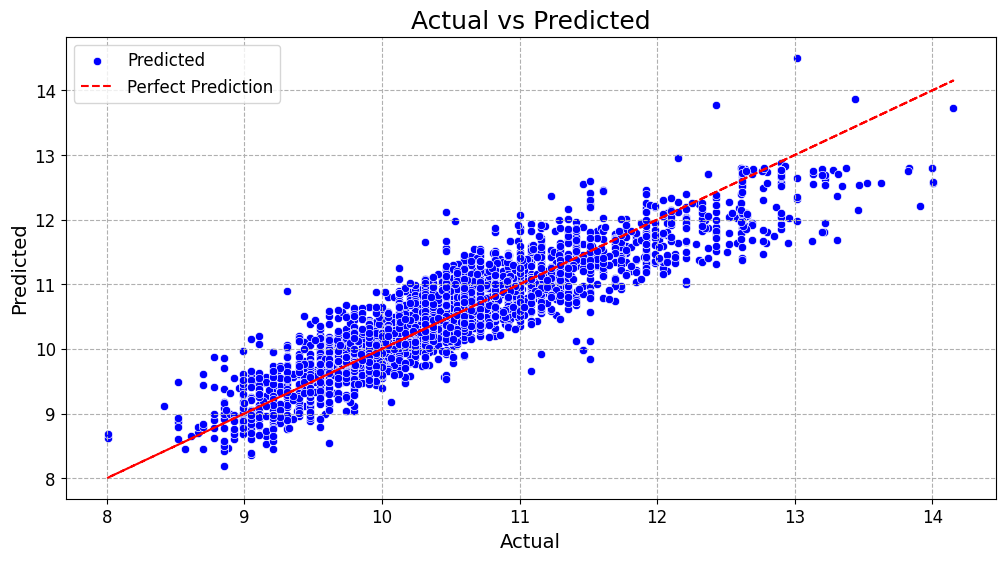

In [179]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x='actual', y='pred', data=comparison , color='blue', label='Predicted')
plt.plot(comparison['actual'], comparison['actual'], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted', fontsize=18)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(linestyle='--')

plt.show()


*  This graph shows how well our model's predictions match the actual values. Each blue dot represents a pair of actual and predicted values.
* The closer these dots are to the red dashed line, the better our predictions are. If they're far from the line, it means our predictions aren't as accurate.


####**7.2.2 Random Forest**

---



Let's  try random forest with our without Scaling split data . because with Scaling features should not affect this algorithm's performance, so we are not going to test it.

In [180]:
rf_model = RandomForestRegressor(random_state=42,n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [181]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

**7.2.2 (I) EVALUATION**


---



In [182]:
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R2_Score:", r2)

Mean Absolute Error (MAE): 0.15339167114847138
Root Mean Squared Error (RMSE): 0.2313834037789457
R2_Score: 0.9414300356306528


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [183]:
comparison = pd.DataFrame({'actual': y_test, 'pred': y_pred})
comparison.head(10)


,actual,pred
4772,10.126631,9.836965
3707,10.596635,10.725946
10484,9.615805,9.502920
6937,12.901747,12.856846
8826,10.239960,9.878112
6829,12.652526,12.668370
10066,8.853665,8.692451
6247,10.308953,10.229199
9358,10.308953,10.325180
4768,9.210340,9.798602


**7.2.1 (II) PLOT MODEL PREDICTION**

---



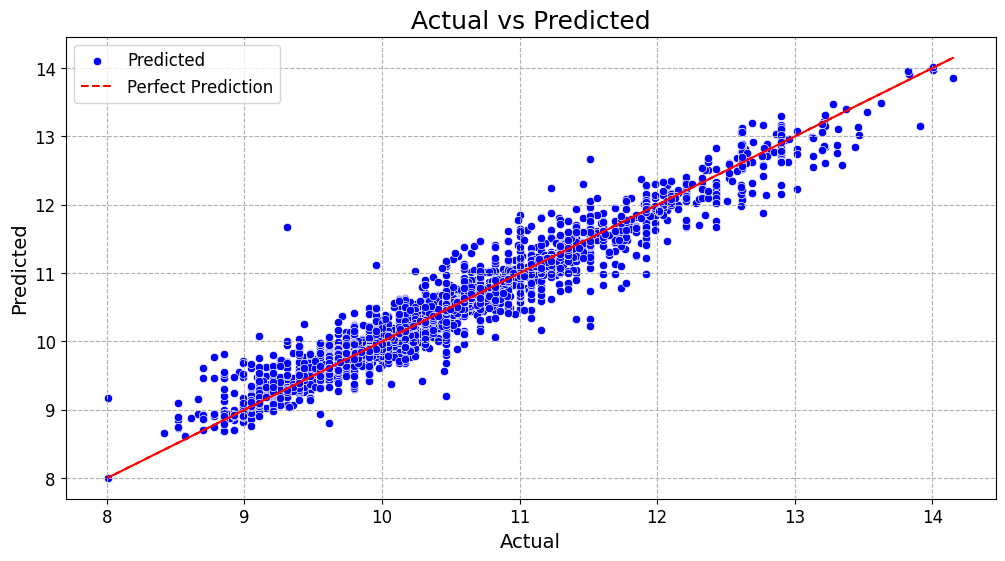

In [184]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x='actual', y='pred', data=comparison , color='blue', label='Predicted')
plt.plot(comparison['actual'], comparison['actual'], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted', fontsize=18)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(linestyle='--')

plt.show()

* Random Forest achieves higher accuracy compared to Linear Regression.

##**7.3 CONCLUSION**

---



* The best prediction performance was acheived using Random Forest regressor, using all features in the dataset, and resulted in the following metrics:

  * Mean Absolute Error (MAE): 0.1529
  * Root mean squared error (RMSE): 0.2305
  * R-squared Score (R2_Score): 0.9418